# Tree Based Models Part 1: `Decision Trees`
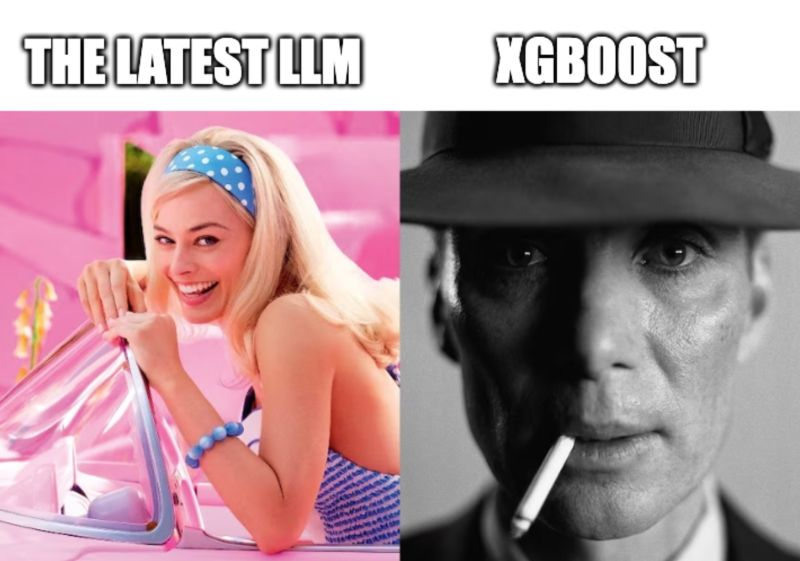

## Introduction

There are countless Machine Learning and Deep Learning algorithms with technical and confusing explanations with little to no practical applications for dealing with **real world database tables**.

For practical data analysts and scientists, one of the most reliable and effective methods for modeling tabular datasets is Ensembles of Decision Trees. Algorithms like XGBoost, LightGBM, and Random Forests have become go-to solutions for tackling challenges in structured data modeling. They not only excel in predictive accuracy but also shine when combined with robust feature engineering. 

Decision Tree-based methods are uniquely suited for answering critical questions about your data, such as:

- Which features (columns) in the dataset contribute most to your predictions?
- How do these features relate to the target (dependent variable)?
- How do different features interact with one another to influence outcomes?
- Which features drive predictions for specific observations or subsets of data?

Moreover, ensembles of decision trees come with additional advantages:

- **Speed**: They train quickly on even moderately large datasets.
- **Interpretability**: Their structure provides clear insights into the decision-making process.
- **Scalability**: They work well on CPU hardware and are efficient for inference at scale, without the need for specialized GPUs.

In this part 1 notebook, we’ll dive into the intuition behind Decision Tree Algorithms, exploring how they work and showcasing several practical implementations. In the next notebook, we’ll take it a step further by introducing Ensembling, Boosting, and Bagging, culminating in a deep dive into **XGBoost** — the algorithm behind hundreds of Kaggle competition wins.

---

## Part 1: Decision Trees
Decision trees are a non-parametric (no assumed form) supervised learning (labeled dataset) method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the features (columns).

They are built using a series of **if-then rules** that partition data based on specific variables. 

For example, a simple decision tree might look like this:

    if Credit = excellent then 
        Outcome = Yes 
    else if Credit = poor then 
        if Income = high then 
            Outcome = Yes 
        else if Income = low then 
            Outcome = No
            
The process starts at the root node and traverses down the tree, asking questions until reaching a leaf node containing the outcome. For instance, someone with poor credit and high income might still qualify for a loan based on the rules.

Here is another example:

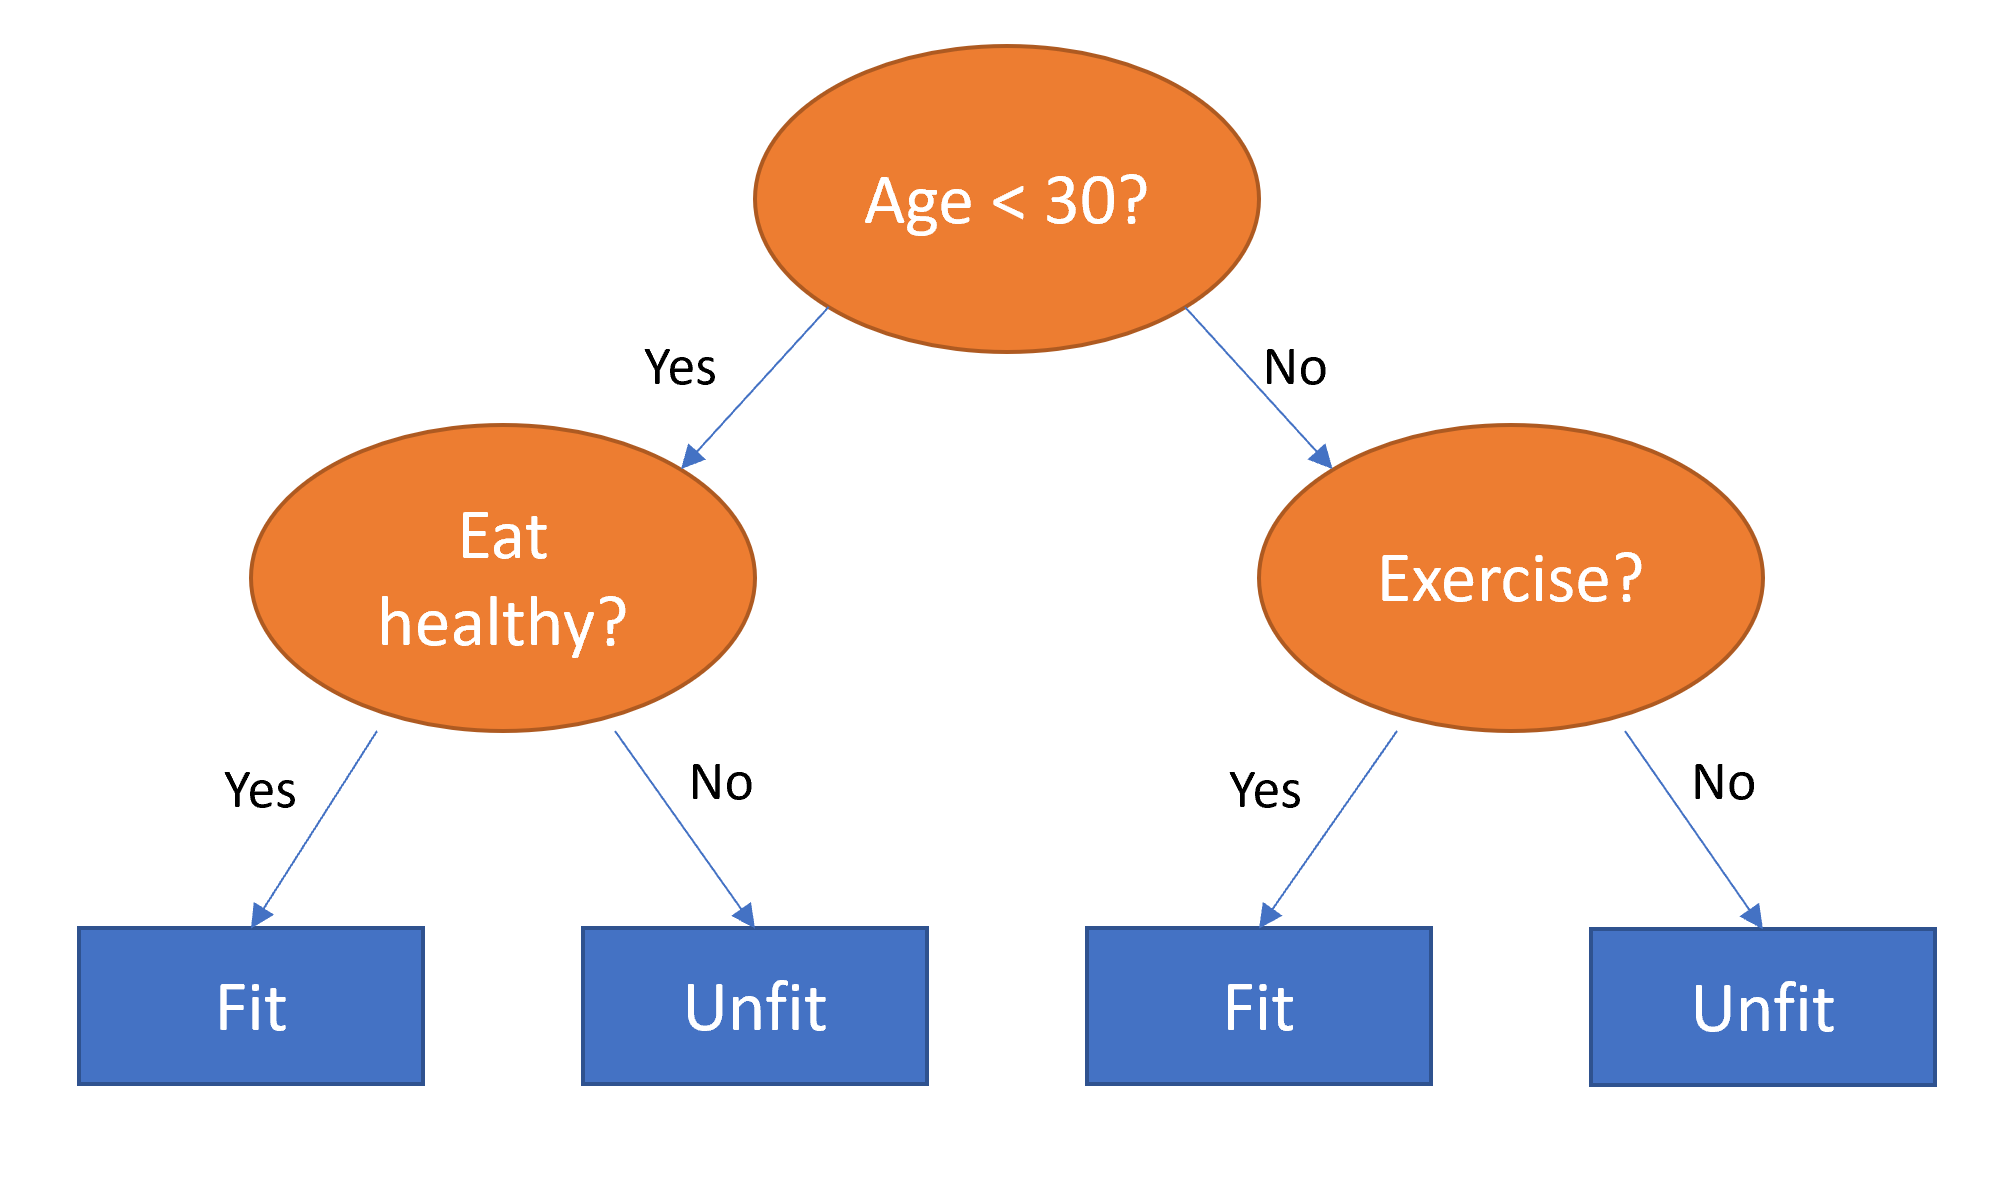

---

## Mechanics of Decision Trees
Decision trees are constructed using a recursive process called **recursive partitioning**, which systematically splits the dataset into smaller and smaller subsets based on the values of its features. This process creates a tree-like structure that models the relationships in the data.

The steps for constructing a decision tree are as follows:

1. **Evaluate Each Feature:**
   - Loop through each column (feature) in the dataset one at a time.

2. **Determine Split Points:**
   - For each feature, test every possible split point:
     - If the feature is numerical, split based on whether values are greater than or less than a specific threshold.
     - If the feature is categorical, split based on whether values are equal to or not equal to a specific category.

3. **Create Temporary Groups:**
   - Divide the dataset into two groups based on the tested split.

4. **Evaluate Group Predictions:**
   - For each group, calculate the **average value of the target variable** for the items in that group.
   - Compare these average values to the actual target values in the group to evaluate how well the split explains the data.

5. **Select the Best Split:**
   - After testing all features and possible split points, choose the **split point** that minimizes the prediction error (e.g., using metrics like Gini Index, Entropy, or Mean Squared Error, depending on the task).

6. **Repeat Recursively:**
   - Use the selected split to divide the data into two subsets.
   - Treat each subset as a smaller dataset and repeat the process starting from step 1 for each subset.

7. **Stop Splitting:**
   - Continue splitting until a **stopping criterion** is met. Common criteria include:
     - A minimum number of samples in a group (e.g., stop splitting if a group contains fewer than 20 items).
     - A maximum tree depth (e.g., stop if the tree reaches 10 levels).
     - Minimal improvement in prediction accuracy from further splits.

---
## Decision Trees for Categorical Variables

When using decision trees with categorical variables, splitting the dataset effectively can be challenging. Here are some key reasons why splitting on categories is more complex than splitting on numerical features:

### Why is it Hard to Split on Categories?

1. **High Cardinality:**
   - Categorical features with many unique levels (e.g., cities, product IDs) result in a large number of possible splits.
   - The algorithm needs to evaluate every combination of categories, which can quickly become computationally expensive.

2. **No Natural Order:**
   - Unlike numerical features, categorical features lack a natural ordering (e.g., colors like red, blue, green). This makes it harder to decide split points without additional context.

3. **Binary Splits with Multiple Levels:**
   - Decision trees often create binary splits (e.g., "Category A or not?"). For features with many levels, this may not fully utilize the information present in the feature.

4. **Overfitting Risk:**
   - Small sample sizes in some categories can lead to overfitting, where the model memorizes specific splits that do not generalize well.

5. **Interaction with Target Classes:**
   - Features with imbalanced distributions across categories may lead to biased splits, favoring the majority class.

---

### Splitting Criteria
Choosing the optimal feature and rule to split the data is critical for the performance of the decision tree. Common splitting criteria include:
- **Information Gain (IG):** Measures the reduction in impurity after a split.
- **Gini Index:** Assesses the homogeneity of child nodes.

The algorithm evaluates all features and selects the one that results in the greatest improvement (based on the chosen criterion). Let’s quickly dive into each:

#### 1. Information Gain (IG)
Information Gain determines the best feature to split on by measuring the reduction in impurity. It is calculated as:

$ IG(D_p, a) = I(D_p) - p_{left}I(D_{left}) - p_{right}I(D_{right}) $

Where:
- $ I $: Impurity measure (e.g., entropy or Gini index).
- $ p_{left}, p_{right} $: Proportions of data in the left and right subsets.

#### 2. Entropy
Entropy quantifies impurity as:

$ I_E(t) = -\sum_{i=1}^{C} p(i|t) \log_2 p(i|t) $

- $ p(i|t) $: Proportion of samples belonging to class $ i $ at node $ t $.
- **Entropy = 0:** All samples belong to one class.
- **Entropy = 1:** Uniform class distribution.

#### 3. Gini Index
The Gini index is another measure of impurity, defined as:

$ I_G(t) = 1 - \sum_{i=1}^{C} p(i|t)^2 $

- **Gini = 0:** Node contains samples from a single class.
- **Gini = 0.5:** Classes are evenly split.

Both measures yield similar results in practice. However, Gini Index is computationally simpler since it avoids logarithmic calculations.

---

### Stopping Criteria
Stopping criteria ensure that decision trees remain interpretable and avoid overfitting by halting the tree-building process when appropriate.

- **Maximum Depth:** Limits the number of levels in the tree. This is one of the most commonly tuned hyperparameters for tree-based methods.
- **Minimum Samples Split:** Ensures that a node must have at least a specified number of samples to be eligible for splitting.
- **Minimum Information Gain:** Sets a threshold for the minimum improvement in impurity reduction required to perform a split.

By combining effective splitting and stopping criteria, decision trees can achieve a balance between accuracy and interpretability.

---

## Decision Trees for Numerical Variables

For regression tasks, decision trees use **Mean Squared Error (MSE)** to measure impurity. The goal is to minimize the variance of the target variable within each node by selecting splits that create the most homogeneous groups.

The impurity at a node $t$ is calculated as:

$ I_{MSE}(t) = \frac{1}{N_t} \sum_{i=1}^{N_t} (y_i - \bar{y})^2 $

Where:
- $ \bar{y} $: The average response value at node $t$.
- $ N_t $: The number of observations at node $t$.
- $ y_i $: The response value of the $i$th observation in the node.

### Explanation:
- **Variance Reduction:** MSE measures the variance of the target variable within a node. Lower variance indicates that the observations in the node are more similar.
- **Splitting Criterion:** At each split, the algorithm calculates the MSE for the resulting child nodes. The split that minimizes the weighted average of MSE across the child nodes is selected.

This process ensures that decision trees for regression effectively model the relationships in the data by reducing variability and making accurate predictions for continuous target variables.

Lets look at some examples.

# Example 1: Modeling a Noisy Cosine Function with Decision Trees

The following code demonstrates how decision tree regressors with varying depths (2, 5, and 10) fit a noisy synthetic dataset based on a cosine function. 

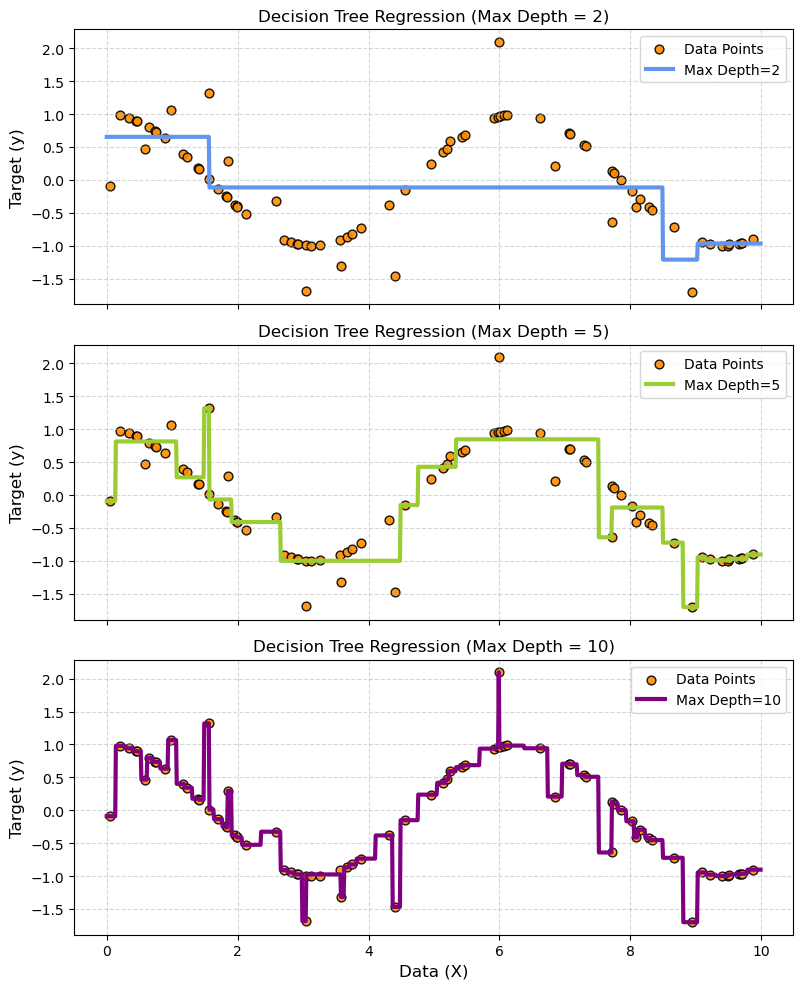

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Synthetic dataset
rng = np.random.RandomState(42)
X = np.sort(10 * rng.rand(80, 1), axis=0) 
y = np.cos(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16)) # adds noise

# Decision Tree Regressors
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Max Depth = 2
axes[0].scatter(X, y, s=40, edgecolor="black", c="darkorange", alpha=0.9, label="Data Points")
axes[0].plot(X_test, y_1, color="cornflowerblue", linewidth=3, label="Max Depth=2")
axes[0].set_title("Decision Tree Regression (Max Depth = 2)")
axes[0].set_ylabel("Target (y)", fontsize=12)
axes[0].grid(visible=True, linestyle="--", alpha=0.5)
axes[0].legend(fontsize=10)

# Max Depth = 5
axes[1].scatter(X, y, s=40, edgecolor="black", c="darkorange", alpha=0.9, label="Data Points")
axes[1].plot(X_test, y_2, color="yellowgreen", linewidth=3, label="Max Depth=5")
axes[1].set_title("Decision Tree Regression (Max Depth = 5)")
axes[1].set_ylabel("Target (y)", fontsize=12)
axes[1].grid(visible=True, linestyle="--", alpha=0.5)
axes[1].legend(fontsize=10)

# Max Depth = 10
axes[2].scatter(X, y, s=40, edgecolor="black", c="darkorange", alpha=0.9, label="Data Points")
axes[2].plot(X_test, y_3, color="purple", linewidth=3, label="Max Depth=10")
axes[2].set_title("Decision Tree Regression (Max Depth = 10)")
axes[2].set_xlabel("Data (X)", fontsize=12)
axes[2].set_ylabel("Target (y)", fontsize=12)
axes[2].grid(visible=True, linestyle="--", alpha=0.5)
axes[2].legend(fontsize=10)

plt.tight_layout()
plt.show()


With this simple example, we can already observe some of the challenges we encounter when trying to model datasets:

- `Model 1` underfits the data, failing to capture much of the complexity in the underlying pattern.
- `Model 2` does a reasonable job, capturing the general trend without overfitting to the noise we introduced.
- `Model 3` overfits the data, meaning its predictions for new (unseen) data are likely to be poor.

For this example, we would move forward with Model 2 because it demonstrates the best balance between bias and variance. This balance ensures the model generalizes well to unseen data, capturing the essential patterns without being overly influenced by noise. 

Lets look at how each of the models splits and arrives at each respective value:

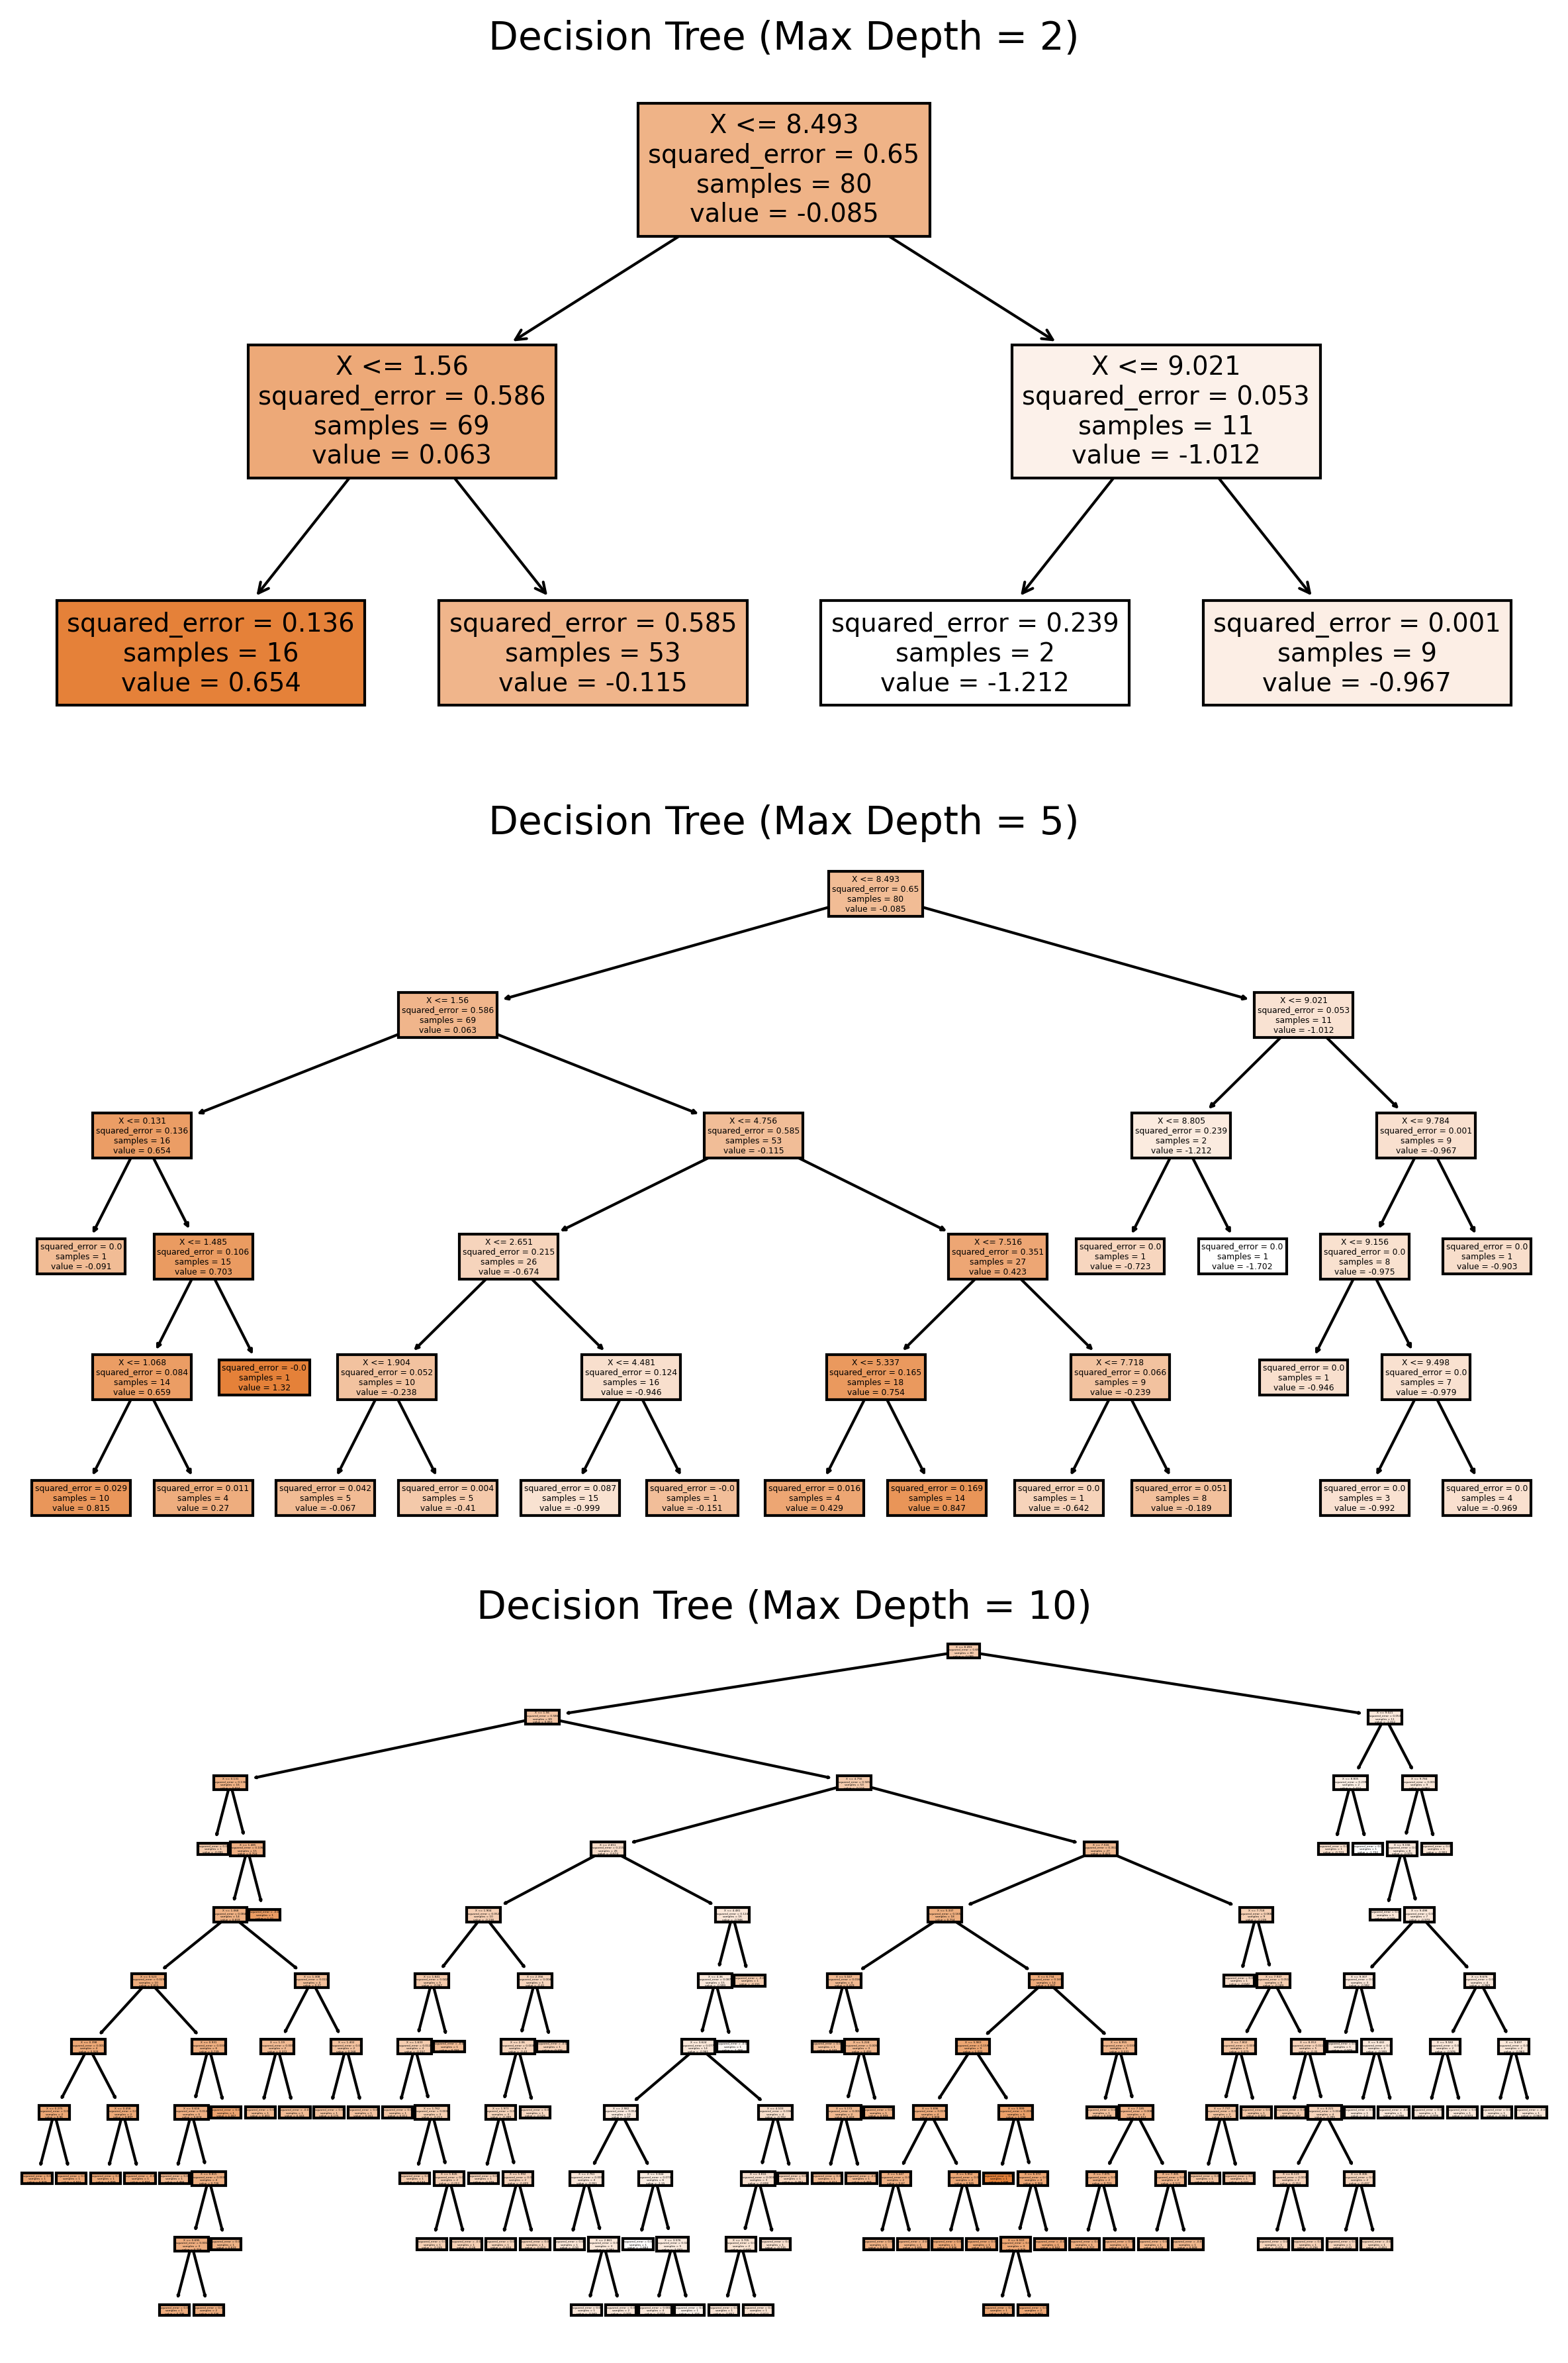

In [2]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(3, 1, figsize=(8, 12), dpi=300)

# Visualize Trees
plot_tree(regr_1, feature_names=["X"], filled=True, ax=axes[0])
axes[0].annotate("Decision Tree (Max Depth = 2)", xy=(0.5, 1), xycoords="axes fraction", ha="center", fontsize=14)

plot_tree(regr_2, feature_names=["X"], filled=True, ax=axes[1])
axes[1].annotate("Decision Tree (Max Depth = 5)", xy=(0.5, 1), xycoords="axes fraction", ha="center", fontsize=14)

plot_tree(regr_3, feature_names=["X"], filled=True, ax=axes[2])
axes[2].annotate("Decision Tree (Max Depth = 10)", xy=(0.5, 1), xycoords="axes fraction", ha="center", fontsize=14)

plt.tight_layout()
plt.show()

The image above shows the structures of decision trees with increasing depths. As depth increases, the trees become more complex, splitting the data into finer regions, which improves fit to training data but increases the risk of overfitting as we saw.

## **Exploring the Bias-Variance Tradeoff**

We've stumbled upon one of the most fundamental challenges in machine learning: **The bias-variance tradeoff**, which represents the balance between a model being too simple or too complex. Decision trees provide an intuitive way to visualize and understand this tradeoff. Many of the core principles here are relevant to SOTA LLMs.

### **High Bias (Underfitting)**
- Models with **high bias** are too simple to capture the underlying patterns in the data. They are overly restrictive and fail to represent the complexity of relationships within the dataset.
- **Effect**: These models underfit the data, leading to poor performance on both training and unseen test data. High-bias models miss important trends and fail to provide meaningful predictions.

>An LLM with insufficient parameters, a poorly chosen architecture, or insufficient training data would exhibit high bias, leading to generic responses or failure to understand nuanced prompts.

### **High Variance (Overfitting)**
- Models with **high variance** are overly complex, capturing not only the true patterns but also the noise in the data. This results in overly specific decision rules that do not generalize well to new data.
- **Effect**: These models overfit the training data, achieving high accuracy on it but performing poorly on unseen test data. High-variance models are sensitive to small fluctuations in the data, leading to fragile predictions.

>An overfit LLM memorizes training data (e.g., verbatim outputs or factual leakage) and fails to generalize to unseen prompts, reducing utility and flexibility in real-world tasks.

### **Balancing Bias and Variance**

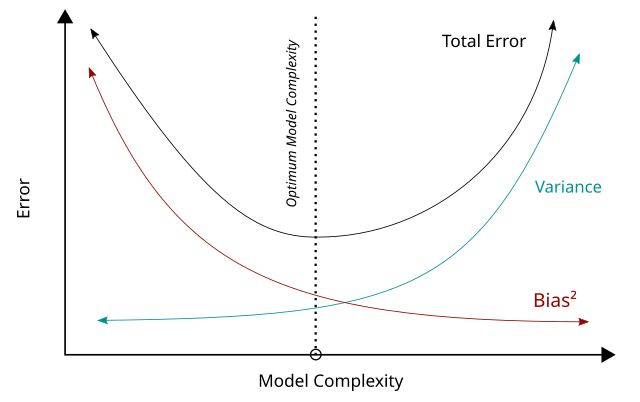

The key is to find a sweet spot that balances bias and variance. This balance ensures that the model captures meaningful patterns in the data without being influenced by irrelevant details or noise. Decision trees are well-suited for tuning this balance through hyperparameters like tree depth and minimum samples per split, making them a versatile tool for structured data analysis.

>In LLMs, pretraining on large, diverse datasets minimizes bias, while fine-tuning on specific tasks with appropriate regularization prevents overfitting, achieving a balanced and adaptable model.

---

## **The Role of Model Complexity**

The complexity of a decision tree governs its ability to represent relationships in the data and generalize to unseen examples. However, complexity comes with tradeoffs in terms of interpretability, performance, and computational cost.

### **Controlling Complexity**

Some of these concepts below we hit already but are worth bringing up again:

1. **Maximum Depth**:
   - Restricting the depth of the tree limits the number of splits, preventing the model from overfitting. Shallower trees are simpler and easier to interpret but may underfit the data.
   - Deeper trees capture more granular patterns but run the risk of overfitting, especially in noisy datasets.

> In LLMs, model complexity is analogous to the number of layers or parameters. Larger models capture more linguistic nuance but may require careful regularization to avoid overfitting.

2. **Minimum Samples per Split**:
   - Setting a minimum number of samples required for a split avoids overly specific rules and helps prevent overfitting. It ensures that splits occur only when there is sufficient data to justify them.

>Analogous to regularization in LLMs, ensuring the model doesn't hyper-focus on rare patterns in the dataset during fine-tuning.

3. **Pruning**:
   - Pruning simplifies a fully grown tree by removing branches that do not improve predictive performance. This reduces overfitting and creates a more robust model.

>Techniques like knowledge distillation simplify LLMs by creating smaller, faster models without significantly sacrificing accuracy.

4. **Splitting Criteria**:
   - Recall Decision trees use impurity measures like **Gini Index**, **Entropy**, or **Mean Squared Error** to determine the optimal splits. Choosing the right criterion for the task helps ensure meaningful partitions of the data.

>LLMs implicitly optimize for criteria like likelihood loss or cross-entropy to ensure the model accurately predicts tokens in context.

---

### **Computational Complexity**
Constructing and querying decision trees has inherent computational costs:
- The **runtime cost** to construct a balanced binary tree is proportional to $ O(n \log n) $, where $ n $ is the number of data points.
- Querying the tree for predictions takes $ O(\log n) $ time, assuming the tree remains approximately balanced.

Although the tree construction algorithm attempts to create balanced trees, they are not always perfectly balanced. Assuming that the subtrees remain approximately balanced, the computational cost at each node involves:
- **Searching through $ k $ features** to find the one that offers the largest reduction in the impurity criterion (e.g., log loss, which is equivalent to information gain). This process incurs a cost of $ O(k) $ at each node.
- Over the entire tree, the total cost becomes $ O(n k \log n) $, accounting for the recursive splits at each level.

>The computational cost of LLMs scales with the number of parameters and tokens in the dataset, with training costs often proportional to$ O(n \cdot k)$, where $ n $ is the number of tokens and $k $ is the model size. Inference costs grow linearly with the size of the model.

---

### **Interpreting Complexity in Real-World Applications**
In practical scenarios:
- Overly simple trees may fail to capture key insights, such as which features drive customer behavior or how different variables interact.
- Overly complex trees may capture irrelevant details, reducing their ability to generalize.

Balancing complexity ensures the model is interpretable, efficient, and capable of generating insights while maintaining robust performance across diverse datasets. Decision trees, with their controllable complexity and scalability, are uniquely suited to strike this balance in real-world structured data problems.

>Similarly, balancing the complexity of LLM architectures ensures they are capable of capturing nuanced relationships in language while remaining computationally efficient and robust to diverse tasks.

Lets move onto a more practical example.

---

# Example 2: Predicting and Understanding Mobile User Behavior

In this section we will use the *Mobile Device Usage and User Behavior Dataset* from Kaggle posted [here](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data)

This dataset provides a very simple look into mobile device usage patterns and user behavior classifications. This is a perfect beginner dataset to get our hands dirty without getting overwhelmed. 

We'll preprocess the data with label encoding, split it into training and testing sets, train the Decision Tree model to predict user behavior classes, and evaluate its performance using the Root Mean Squared Error (RMSE). Additionally, a visual representation of the decision tree is generated to interpret the model's decision-making process.

As always, start with some key questions:

### **What metrics most influence user behavior classification?**  
   - Understanding the contribution of app usage, screen-on time, battery drain, and data consumption in determining behavior classes.

### **Can we reliably predict user behavior classes from device usage patterns?**  
   - Using decision tree regression to classify users into one of five behavior classes.

### **Which features have the greatest impact on predicting user behavior?**  
   - Leveraging the decision tree to identify the most important variables for classification.

### **What is the model's accuracy when applied to unseen users?**  
   - Quantifying the predictive performance using the RMSE metric.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Read in Data, Print 5 rows
df = pd.read_csv('user_behavior_dataset.csv')
df.drop(columns='User ID',inplace=True,axis=1)
df.head(5)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
# Label Encode Categoricals
le = LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
    
df.head(5)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


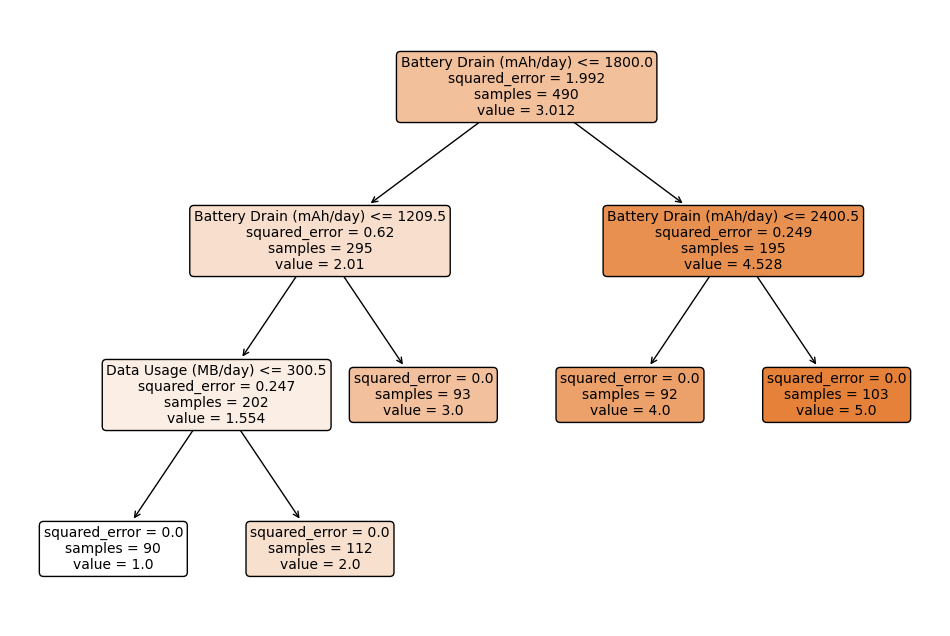

Root Mean Squared Error: 0.0 



In [5]:
# Define features and target
X = df.drop(columns='User Behavior Class')
y = df['User Behavior Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# Make predictions and calculate RMSE
y_pred = tree_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}", "\n")

### **Interpreting the Decision Tree**
>**Note**: The decision tree highlights Battery Drain and Data Usage as the most significant features for predicting User Behavior Class because they directly correlate with user activity levels. High battery drain often indicates intensive usage, while high data usage reflects app activity patterns, making these features extremely predictive. This dominance is very unusual in most datasets, as behavior is often influenced by interactions between features or latent variables that are not explicitly captured. Regardless, for our purposes its a great dataset to showcase a DT implementation. Keep that in mind, lets move on:

This decision tree visualizes how the dataset is split based on its most important features `Battery Drain` and `Data Usage` to predict `User Behavior Class`.


### **What metrics most influence user behavior classification?** 

**Primary Feature: Battery Drain (mAh/day)**:
   - The first split occurs at `Battery Drain <= 1800.0`, indicating that battery consumption is the most significant factor in determining user behavior. Users with lower battery drain are classified into lower behavior classes, while higher battery drain correlates with higher classes.
   - Subsequent splits at `Battery Drain <= 1209.5` and `Battery Drain <= 2400.5` further refine the classification, suggesting finer granularity within different levels of battery consumption.

**Secondary Feature: Data Usage (MB/day)**:
   - After splitting on battery drain, users with `Battery Drain <= 1209.5` are further classified based on `Data Usage <= 300.5`. This indicates that data consumption plays an important role in distinguishing lighter usage classes (Class 1 and 2).

---

### **Can we reliably predict user behavior classes from device usage patterns?**  
The tree predicts one of five user behavior classes:
  - **Class 1**: Users with low battery drain (`<= 1209.5 mAh/day`) and low data usage (`<= 300.5 MB/day`).
  - **Class 2**: Users with moderate battery drain (`<= 1209.5 mAh/day`) but higher data usage (`> 300.5 MB/day`).
  - **Class 3**: Users with higher battery drain (`1209.5 < Battery Drain <= 1800 mAh/day`).
  - **Class 4**: Users with very high battery drain (`1800 < Battery Drain <= 2400.5 mAh/day`).
  - **Class 5**: Users with extreme battery drain (`Battery Drain > 2400.5 mAh/day`).

---

### **Which features have the greatest impact on predicting user behavior?**  
**Battery Drain**:
  - This feature dominates the splits and is critical for identifying heavy or extreme user behavior (Classes 3, 4, and 5).
**Data Usage**:
  - It is used to differentiate between light and moderate usage classes (Classes 1 and 2) in users with low battery drain.


### **What is the model's accuracy when applied to unseen users?**  
- The tree assigns specific user behavior classes (`value` attribute) at the leaf nodes based on the conditions met at each split.
- The **squared error** at each leaf is `0`, indicating that the tree perfectly fits the training data within the defined splits. This is extremely uncommon but makes for a good example application.
---

## What if we get rid of highly correlated columns?

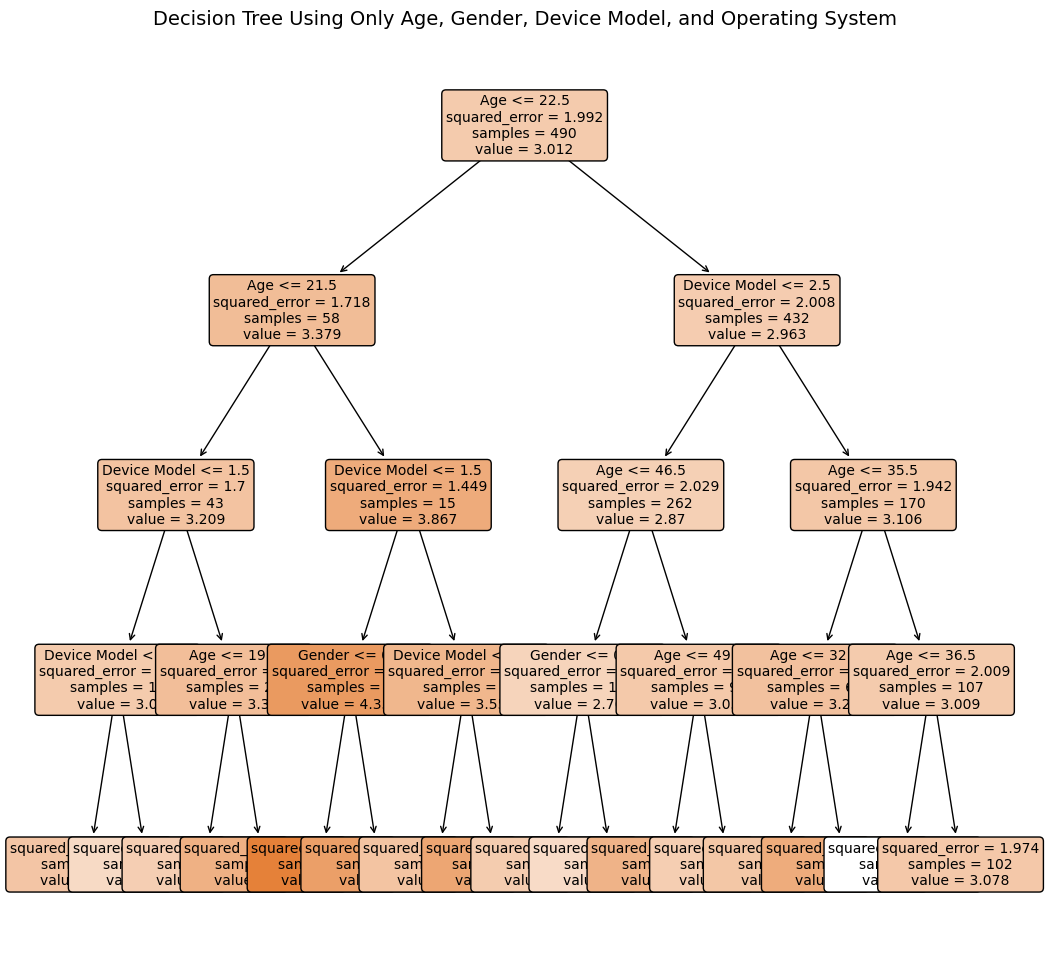

Root Mean Squared Error (Selected Features): 1.3900797701111731 

            Feature  Importance
0               Age    0.713784
2      Device Model    0.173726
1            Gender    0.112490
3  Operating System    0.000000


In [6]:
X_selected = X[['Age', 'Gender', 'Device Model', 'Operating System']]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

tree_reg_selected = DecisionTreeRegressor(
    max_depth=4,    
    random_state=42
)
tree_reg_selected.fit(X_train_selected, y_train)

plt.figure(figsize=(12, 12))
plot_tree(tree_reg_selected, feature_names=X_selected.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Using Only Age, Gender, Device Model, and Operating System", fontsize=14)
plt.show()

y_pred_selected = tree_reg_selected.predict(X_test_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)
print(f"Root Mean Squared Error (Selected Features): {rmse_selected}", "\n")

feature_importance = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': tree_reg_selected.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


### **Comparison**

These reults differ significantly from using features like **Battery Drain** and **Data Usage**, which were heavily correlated with the target variable:
- **Less Direct Influence**: The selected features, such as **Age** and **Device Model**, are less directly tied to user behavior compared to metrics like battery consumption and data usage.
- **Broader Contextual Insights**: The selected features provide demographic and device-level context rather than immediate behavioral metrics, making the model more reliant on indirect patterns.
- **Distributed Importance**: Unlike heavily correlated features, which dominate the tree, the selected features distribute their importance more evenly, reflecting a greater reliance on multiple factors.

This difference highlights how models behave when predictive power shifts from direct correlations to more generalized, contextual information. This model is potentially more robust but may sacrifice some predictive accuracy compared to using heavily correlated features.

>Notice that with decision trees, Random Forests, and XGBoost, we don’t need to worry about issues like multicollinearity or other assumptions of linear regression! Instead of avoiding correlated features, these models can leverage them effectively by naturally prioritizing the most predictive features during splits, automatically reducing redundancy and focusing on the most informative variables.>

---

Given this constrained feature space, how can we optimize our parameters to get better results?

## Hyperparameter Optimization for Decision Trees

### **What is Hyperparameter Optimization?**
Hyperparameter optimization is the process of systematically tuning the parameters of a machine learning model to achieve the best possible performance. Unlike model parameters (e.g., weights in a linear model), hyperparameters are set before training begins and directly influence the learning process.

For decision trees, hyperparameters control aspects like the tree's depth, the minimum number of samples required for a split, or how splits are selected. Optimizing these ensures that the model generalizes well to unseen data, balancing overfitting and underfitting.

---

### **Common Hyperparameters for Decision Trees**
1. **`max_depth`**:
   - Limits the depth of the tree to prevent overfitting.
   - A shallower tree is less likely to memorize the training data but may underfit.

2. **`min_samples_split`**:
   - Specifies the minimum number of samples required to split an internal node.
   - Higher values reduce overfitting by ensuring splits occur only with sufficient data.

3. **`min_samples_leaf`**:
   - Determines the minimum number of samples required in a leaf node.
   - Larger values create more robust trees with fewer splits.

4. **`min_impurity_decrease`**:
   - A node will split only if the impurity reduction is greater than or equal to this threshold.
   - Helps avoid splits that contribute little to improving the model's performance.

5. **`criterion`**:
   - Defines the function used to measure the quality of a split (e.g., `squared_error` or `friedman_mse` for regression).
   - Impacts how features are chosen for splits.

---

### **Optimization Strategies**
- **Grid Search**:
  - Tests all combinations of predefined hyperparameter values.
  - Comprehensive but computationally expensive for large grids.
  
- **Randomized Search**:
  - Samples a fixed number of random combinations from a hyperparameter distribution.
  - Faster than grid search for larger parameter spaces.
  
- **Bayesian Optimization**:
  - Uses probabilistic models to select the most promising hyperparameter combinations, balancing exploration and exploitation.

- **Cross-Validation**:
  - Essential for robust hyperparameter optimization, ensuring the model performs well across different data splits.

Below we will implement a grid search to optimize our parameters given our constrained feature space:


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 20}
Root Mean Squared Error with Best Parameters: 1.385756448285746 (Previously Model's RSME: 1.5)


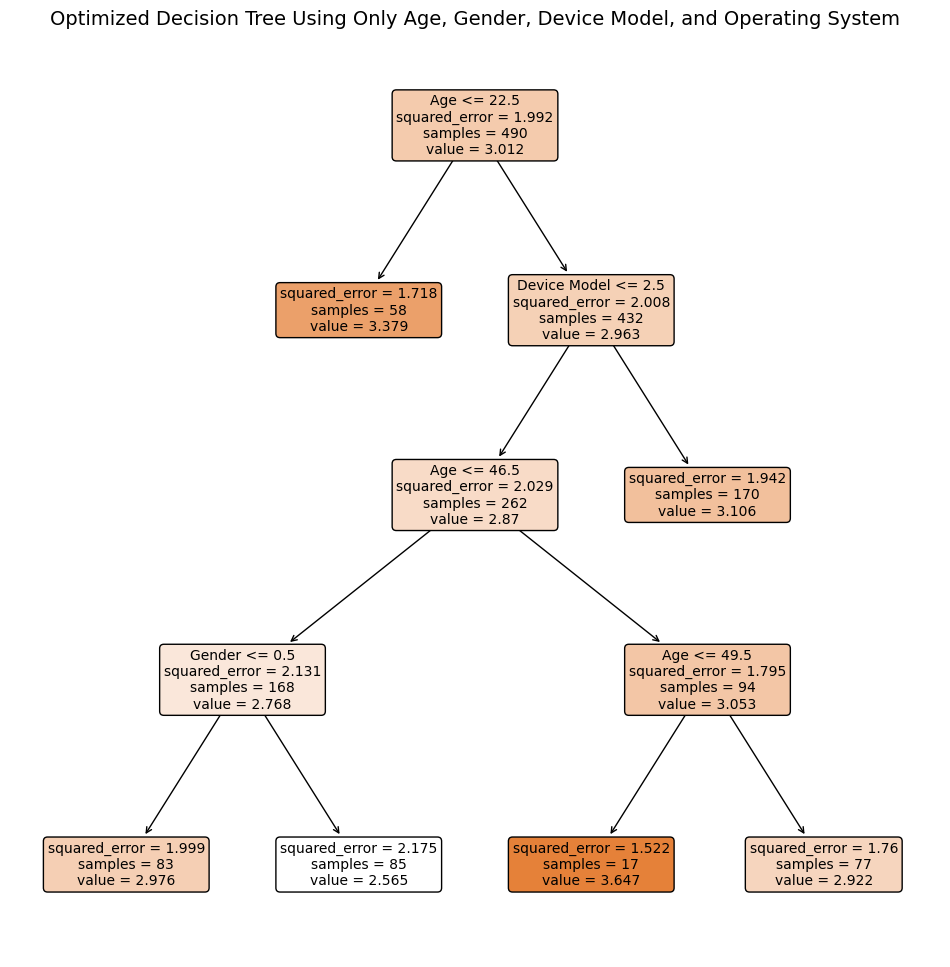

Feature Importance:
             Feature  Importance
0               Age    0.621836
1            Gender    0.209353
2      Device Model    0.168812
3  Operating System    0.000000


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the parameter grid
param_grid = {
    'max_depth': [5],
    'min_impurity_decrease': [0.0, 0.001, 0.003, 0.005, 0.01],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Utilize all processors
)
grid_search.fit(X_train_selected, y_train)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
y_pred_selected = best_tree.predict(X_test_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)
print(f"Root Mean Squared Error with Best Parameters: {rmse_selected} (Previously Model's RSME: 1.5)")

# Visualize the best decision tree
plt.figure(figsize=(12, 12))
plot_tree(best_tree, feature_names=X_selected.columns, filled=True, rounded=True, fontsize=10)
plt.title("Optimized Decision Tree Using Only Age, Gender, Device Model, and Operating System", fontsize=14)
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


## **Shifting Strategies with XGBoost and Advanced Algorithms**
When we use more sophisticated algorithms like **XGBoost**, **LightGBM**, or **CatBoost**, hyperparameter optimization becomes more complex due to the additional flexibility and number of parameters:

1. **Key Additional Hyperparameters**:
   - **Learning Rate (`eta`)**: Controls the contribution of each tree to the final prediction, balancing speed and accuracy.
   - **Number of Trees (`n_estimators`)**: Determines the number of boosting rounds.
   - **Subsampling (`subsample`)**: Specifies the fraction of data used for training each tree, reducing overfitting.
   - **Regularization Parameters (`lambda`, `alpha`)**: Penalize complexity to improve generalization.

2. **Advanced Strategies**:
   - **Early Stopping**: Monitor validation performance and stop training when improvements plateau.
   - **Hyperparameter Optimization Libraries**:
     - Libraries like `Optuna`, `Hyperopt`, or `skopt` can efficiently search large hyperparameter spaces using techniques like Bayesian optimization.

3. **Feature Engineering**:
   - For gradient boosting models, optimizing hyperparameters often goes hand-in-hand with careful feature engineering, as these models are sensitive to feature scaling and selection.


## Conclusion

### In this Notebook, We Covered:
- **Intuition behind Decision Trees**:
  - Explored how decision trees create a hierarchy of decision rules to partition data and make predictions.
- **DTs for Classification**:
  - Discussed how trees classify data into categories based on splitting criteria.
- **Splitting Criteria (Information Gain, Entropy, Gini Index)**:
  - Introduced key metrics used to determine optimal splits and their impact on tree performance.
- **Stopping Criteria**:
  - Highlighted how depth, minimum samples per split, and impurity thresholds prevent overfitting.
- **DTs for Regression**:
  - Examined how decision trees predict continuous target variables by minimizing variance in target values.
- **Example Implementations**:
  - Provided practical examples of decision trees applied to real datasets for both regression and classification tasks.
- **Bias-Variance Tradeoffs**:
  - Explained the delicate balance between underfitting (high bias) and overfitting (high variance) and how trees can address this.
- **Model Complexity**:
  - Analyzed how tree depth and splits influence interpretability and performance.
- **Computational Complexity**:
  - Discussed the runtime and scalability of decision tree algorithms, focusing on node-level computations and overall tree construction.
- **Hyperparameter Optimization Strategies**:
  - Showcased techniques like grid search, randomized search, and advanced approaches for improving decision tree performance.

This comprehensive exploration of decision trees provides a solid foundation for understanding their mechanics, strengths, and limitations. Decision trees are intuitive, interpretable, and effective tools for structured data analysis, but their true power shines when used as part of ensemble methods.

---

## Part 2: Ensembles of Decision Trees

In the next post, we’ll dive into **Ensembles of Decision Trees**, which combine the strengths of multiple trees to create more robust and accurate models. Topics will include:

- **Random Forests**:
  - How bagging (Bootstrap Aggregating) improves stability and reduces overfitting by training multiple trees on random subsets of data.
- **Gradient Boosting**:
  - The step-by-step improvement of weak learners to minimize prediction errors.
- **XGBoost**:
  - A state-of-the-art implementation of gradient boosting that achieves high performance through advanced regularization and optimization techniques.
- **Comparison of Ensemble Methods**:
  - Exploring the trade-offs between Random Forests and Gradient Boosting for different use cases.
- **Hyperparameter Tuning for Ensembles**:
  - Strategies for optimizing parameters like learning rates, tree depth, and subsampling in ensemble models.
- **Real-World Applications**:
  - Practical examples of how ensembles are used in domains like finance, healthcare, and sports analytics.

### Why Ensembles?
While individual decision trees are interpretable and effective, their simplicity can sometimes limit performance. By combining multiple trees, ensembles leverage the "wisdom of the crowd" to achieve higher predictive power, making them the go-to choice for many machine learning challenges.
